## Hypothesis Testing

#### For each of the following questions, 
#### - formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. 

#### Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### 1. Has the network latency gone up since we switched internet service providers?


#### 1. - Null Hypothesis

There is no difference in network latency since changing internet providers.

#### 1. - Alternative Hypothesis

There is a difference in network latency since changing internet providers.

#### 1. - True Positive

There IS a difference in network latency and we conclude there is a difference in network latency. 

#### 1. - True Negative

There is NO difference in network latency and we conclude there is no difference in network latency 

#### 1. - Type I Error

We reject (accepting as false) the hypothesis that there was no difference in latency, when in fact, there was no difference in latency, and the hypothesis was true. 


#### 1. - Type II Error

We failed to reject (accepting as true) the hypothesis that there was no difference in latency, when in fact, there was a difference in latency, and the hypothesis was false. 

### 2. Is the website redesign any good?


#### 2. - Null Hypothesis

There is no difference in the number of website visits per day since the redesign date. 

#### 2 - Alternative Hypothesis

There is a difference in the number of website visits per day since the redesign date. 

#### 2. - True Positive

There IS a difference in website visits per day since the redesign date, and we conclude there is a difference in website visits per day since the redesign date. 

#### 2. - True Negative

There is NO difference in webstie visits per day since the redesign date and we conclude there is no differencce in website visits per day since the redesign date. 

#### 2. - Type I Error

We reject (accepting as false) the hypothesis that there is no difference in website visists per day since the redesign date, when in fact there is no difference in website visits per day since the redesign date, and the hyposthesis is in fact true. 

#### 2. - Type II Error

We fail to reject (accepting as true) that there is no difference in website visits per day since the redesign date, when in fact there IS a difference in website visists per day since the redesign date, and the hypothesis is in fact false.

### 3. Is our television ad driving more sales?

#### 3. - Null Hypothesis

There is no difference in total sales following the television ad.

#### 3. - Alternative Hypothesis
There is a difference in total sales following the television ad. 

#### 3. - True Positive

There IS a difference in total sales following the television ad, and we conclude there is a difference in total sales following the television ad. 

#### 3. - True Negative
There is NO difference in total sales following the television ad, and we conclude there is NO difference in total sales following the television ad.

#### 3. - Type I Error

We reject (accepting as false) the hypothesis that there is no difference in sales following the television ad, when in fact there is no difference total sales following the television ad, and the hyposthesis is in fact true. 

#### 3. - Type II Error

We fail to reject (accepting as true) that there is no difference in sales following the television ad, when in fact there IS a difference in sales following the television ad, and the hypothesis is in fact false.

# T-TEST 

#### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

#### - A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 

#### - A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
- Use a .05 level of significance.

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
np.random.seed(123)

In [49]:
# I beleive office 1 sells homes more quickly than office 2. 
# Is the average number of days it takes to sell a home higher for office 2?

#### - a. Distributions

<AxesSubplot:>

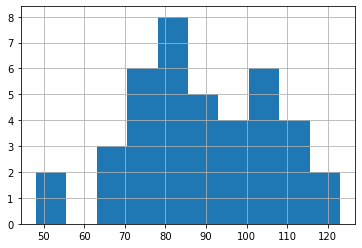

In [50]:
office_1 = pd.Series(stats.norm(90, 15).rvs(40))
office_1.hist()

<AxesSubplot:>

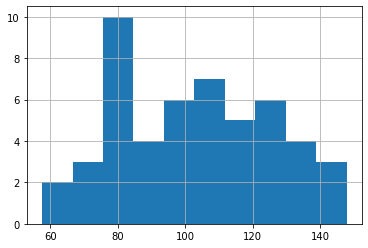

In [51]:
office_2 = pd.Series(stats.norm(100, 20).rvs(50))
office_2.hist()

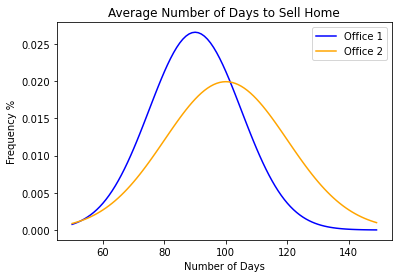

In [52]:
x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)


plt.plot(x, y1, c='blue', label = 'Office 1')
plt.plot(x, y2, c='orange', label = 'Office 2')


plt.ylabel('Frequency %')
plt.xlabel('Number of Days')
plt.title('Average Number of Days to Sell Home')
plt.legend()

#### - b. Set Hypothesis

In [53]:
# HO - Mean sale time of Office 1 == mean sale time of Office 2. 
# Ha - Mean sale time of Office 1 != the mean sale time of Office 2. 

#### - c. Set Alpha

In [54]:
α = 0.05

#### - d. Assumptions

#### Normal: Yes!
#### Independent: Yes!
#### Variance:

In [55]:
office_1_var = 15**2
office_1_var

225

In [56]:
office_2_var = 20**2
office_2_var

400

#### - e. Compute Test Statistics

In [66]:

mean1 = 90
std1 = 15
nobs1 = 40

mean2 = 100 
std2 = 20
nobs2 = 50

# equal_var=False 
# alternative='two-sided'


t, p = stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=False)
t, p

(-2.7091418459143854, 0.00811206270346016)

#### - f.   Decide

In [72]:
# Check if p < α

if p < α:
    print("We reject the H0")
else:
    print("We fail to reject H0")

We reject the H0


#### -Load the mpg dataset and use it to answer the following questions:

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
np.random.seed(123)

In [111]:
from pydataset import data
mpg = data('mpg') 

In [112]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### 1. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

#### - a. Distributions

In [113]:
mpg['fuel_efficiency'] = (mpg.cty + mpg.hwy) / 2

In [83]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel-efficiency,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [93]:
cars_2008 = mpg[mpg.year == 2008].fuel_efficiency
cars_2008.head()

3     25.5
4     25.5
7     22.5
10    24.0
11    23.0
Name: fuel_efficiency, dtype: float64

In [94]:
cars_1999 = mpg[mpg.year == 1999].fuel_efficiency
cars_1999.head()

1    23.5
2    25.0
5    21.0
6    22.0
8    22.0
Name: fuel_efficiency, dtype: float64

<AxesSubplot:>

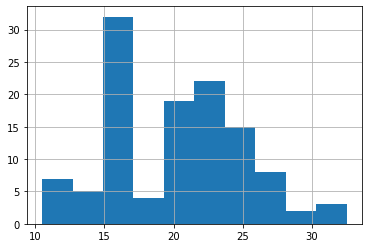

In [99]:
cars_2008.hist()

<AxesSubplot:>

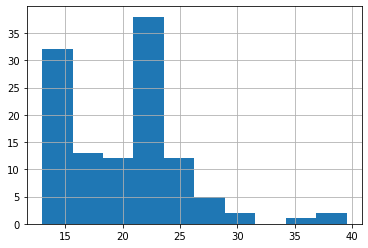

In [97]:
cars_1999.hist()

#### - b. Set Hypothesis

In [ ]:
#H0 - Fuel efficiency in cars from 2008 == fuel efficiency in cars from 1999.
#Ha - Fuel efficiency in cars from 2008 != fuel efficiency in cars from 1999.

#### - c. Set Alpha

In [ ]:
α = 0.05

#### - d. Assumptions

#### Normal: Yes!
#### Independent: Yes!
#### Variance:

In [101]:
print(cars_2008.var())

24.097480106100797


In [102]:
print(cars_1999.var())

27.122605363984682


#### - e. Compute Test Statistics

In [105]:
t, p = stats.ttest_ind(cars_2008, cars_1999, equal_var = False)
t, p

(-0.21960177245940962, 0.8263750772060638)

#### - f.  Decide

In [107]:
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

We fail to reject the H0.


### 2. Are compact cars more fuel-efficient than the average car?

#### - a. Distributions

In [114]:
mpg.head()

# sub-sample vs. entire population

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [122]:
mpg = mpg.rename(columns={'class' : 'class_type'})
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class_type,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [126]:
compact_cars = mpg[mpg.class_type == 'compact'].fuel_efficiency
compact_cars

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
6      22.0
7      22.5
8      22.0
9      20.5
10     24.0
11     23.0
12     20.0
13     21.0
14     21.0
15     20.0
142    25.0
143    23.0
170    22.5
171    23.5
172    22.0
173    23.5
187    24.0
188    25.0
189    26.0
190    26.5
191    22.0
192    22.0
193    22.5
194    27.0
195    28.5
196    30.5
197    32.5
198    30.5
208    25.0
209    22.5
210    25.0
211    25.5
212    20.5
213    38.5
214    25.0
215    22.5
216    25.5
217    25.0
218    25.0
219    25.0
220    19.5
221    20.5
Name: fuel_efficiency, dtype: float64

In [142]:
overall_fuel_efficiency = mpg.fuel_efficiency.mean()
overall_fuel_efficiency

20.14957264957265

<AxesSubplot:>

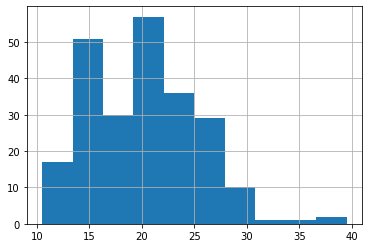

In [143]:
mpg.fuel_efficiency.hist()

In [139]:
compact_fuel_efficiency = mpg[mpg.class_type == 'compact'].fuel_efficiency
compact_fuel_efficiency

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
6      22.0
7      22.5
8      22.0
9      20.5
10     24.0
11     23.0
12     20.0
13     21.0
14     21.0
15     20.0
142    25.0
143    23.0
170    22.5
171    23.5
172    22.0
173    23.5
187    24.0
188    25.0
189    26.0
190    26.5
191    22.0
192    22.0
193    22.5
194    27.0
195    28.5
196    30.5
197    32.5
198    30.5
208    25.0
209    22.5
210    25.0
211    25.5
212    20.5
213    38.5
214    25.0
215    22.5
216    25.5
217    25.0
218    25.0
219    25.0
220    19.5
221    20.5
Name: fuel_efficiency, dtype: float64

<AxesSubplot:>

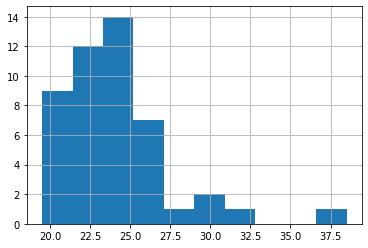

In [144]:
compact_fuel_efficiency.hist()

#### - b. Set Hypothesis

In [ ]:
#H0 - Compact car fuel-efficicency = the average car fuel_efficiency.
#Ha - Compact cars fuel-efficiency is > the average car fuel-efficiency.

#### - c. Set Alpha

In [ ]:
α = 0.05

#### - d. Assumptions

#### Normal: Yes!

#### - e. Compute Test Statistics

In [131]:
t, p = stats.ttest_1samp(compact_fuel_efficiency, overall_fuel_efficiency, alternative = 'greater')
t, p

(7.896888573132535, 2.0992818971585668e-10)

#### - f.  Decide

In [134]:
if (p < α) & (t > 0):
    print("We reject the H0.")
else:
     print("We fail to reject the H0.")

We reject the H0.


### 3. Do manual cars get better gas mileage than automatic cars?

#### - a. Distributions

#### - b. Set Hypothesis

#### - c. Set Alpha

In [ ]:
α = 0.05

#### - d. Assumptions

In [ ]:
t, p = 

#### - e. Compute Test Statistics

#### - f.   (Depends on Test - Update based on type of test)